In [1]:
import pandas as pd
import numpy as np

<h2>Data Dictionary/features</h2>

|Field Name		|	  	Definition|
|----------|--------------|
|RefID	|		        Unique (sequential) number assigned to vehicles|
|IsBadBuy	|			Identifies if the kicked vehicle was an avoidable purchase |
|PurchDate	|			The Date the vehicle was Purchased at Auction |
|Auction		|			Auction provider at which the  vehicle was purchased |
|VehYear		|			The manufacturer's year of the vehicle |
|VehicleAge|				The Years elapsed since the manufacturer's year |
|Make			|		Vehicle Manufacturer  |
|Model			|		Vehicle Model |
|Trim			|		Vehicle Trim Level |
|SubModel	|			Vehicle Submodel |
|Color			|		Vehicle Color |
|Transmission|				Vehicles transmission type (Automatic, Manual) |
|WheelTypeID	|			The type id of the vehicle wheel |
|WheelType		|		The vehicle wheel type description (Alloy, Covers) |
|VehOdo			|		The vehicles odometer reading |
|Nationality	|			The Manufacturer's country |
|Size			|		The size category of the vehicle (Compact, SUV, etc.) |
|TopThreeAmericanName |			Identifies if the manufacturer is one of the top three American manufacturers |
|MMRAcquisitionAuctionAveragePrice |	Acquisition price for this vehicle in average condition at time of purchase	|
|MMRAcquisitionAuctionCleanPrice	|	Acquisition price for this vehicle in the above Average condition at time of purchase |
|MMRAcquisitionRetailAveragePrice |	Acquisition price for this vehicle in the retail market in average condition at time of purchase |
|MMRAcquisitonRetailCleanPrice	|	Acquisition price for this vehicle in the retail market in above average condition at time of purchase |
|MMRCurrentAuctionAveragePrice	|	Acquisition price for this vehicle in average condition as of current day	 |
|MMRCurrentAuctionCleanPrice	|	Acquisition price for this vehicle in the above condition as of current day |
|MMRCurrentRetailAveragePrice	|	Acquisition price for this vehicle in the retail market in average condition as of current day |
|MMRCurrentRetailCleanPrice	|	Acquisition price for this vehicle in the retail market in above average condition as of current day |
|PRIMEUNIT		|		Identifies if the vehicle would have a higher demand than a standard purchase |
|AcquisitionType	|			Identifies how the vehicle was aquired (Auction buy, trade in, etc) |
|AUCGUART	|			The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is) |
|KickDate		|		Date the vehicle was kicked back to the auction
|BYRNO		|			Unique number assigned to the buyer that purchased the vehicle
|VNZIP     |                              Zipcode where the car was purchased
|VNST    |                                State where the the car was purchased
|VehBCost	|			Acquisition cost paid for the vehicle at time of purchase
|IsOnlineSale		|		Identifies if the vehicle was originally purchased online
|WarrantyCost     |                       Warranty price (term=36month  and millage=36K) 



In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df_train = pd.read_csv("/content/drive/My Drive/data/badbuyprediction/training.csv")
print(df_train.shape)
df_test = pd.read_csv("/content/drive/My Drive/data/badbuyprediction/test.csv")
print(df_test.shape)
df_test_copy = df_test.copy()

(72983, 34)
(48707, 33)


<h2>Exploratory Data Analysis</h2>

In [4]:
df_train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [5]:
df_test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0




> VNZIP1,isonlinesale is categorial , wheeltypeid is repetitive of wheeltype



In [8]:
df_train.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


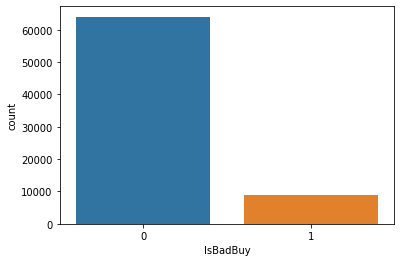

In [11]:
sns.countplot(df_train['IsBadBuy'])
plt.show()

<h6>Observation</h6>


> Imbalanced binary classification, upsample the miniority class



In [12]:
numcol = df_train.select_dtypes('number').columns.tolist()
catcol = df_train.select_dtypes('object').columns.tolist()
print(numcol,"\n", catcol)

['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'] 
 ['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']


In [13]:
numcol = list(set(numcol) - {'IsBadBuy','IsOnlineSale','VNZIP1',})
catcol = list(set(catcol).union({'IsOnlineSale','VNZIP1'}))
print(numcol,"\n", catcol)

['MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'WarrantyCost', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'WheelTypeID', 'RefId', 'MMRCurrentAuctionCleanPrice', 'BYRNO', 'VehicleAge', 'VehYear', 'VehOdo', 'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'VehBCost', 'MMRAcquisitionAuctionCleanPrice'] 
 ['Model', 'Color', 'TopThreeAmericanName', 'AUCGUART', 'Make', 'SubModel', 'PRIMEUNIT', 'Transmission', 'VNZIP1', 'VNST', 'WheelType', 'Nationality', 'PurchDate', 'IsOnlineSale', 'Trim', 'Auction', 'Size']


<h4>Categorical features</h4>


> countplots



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


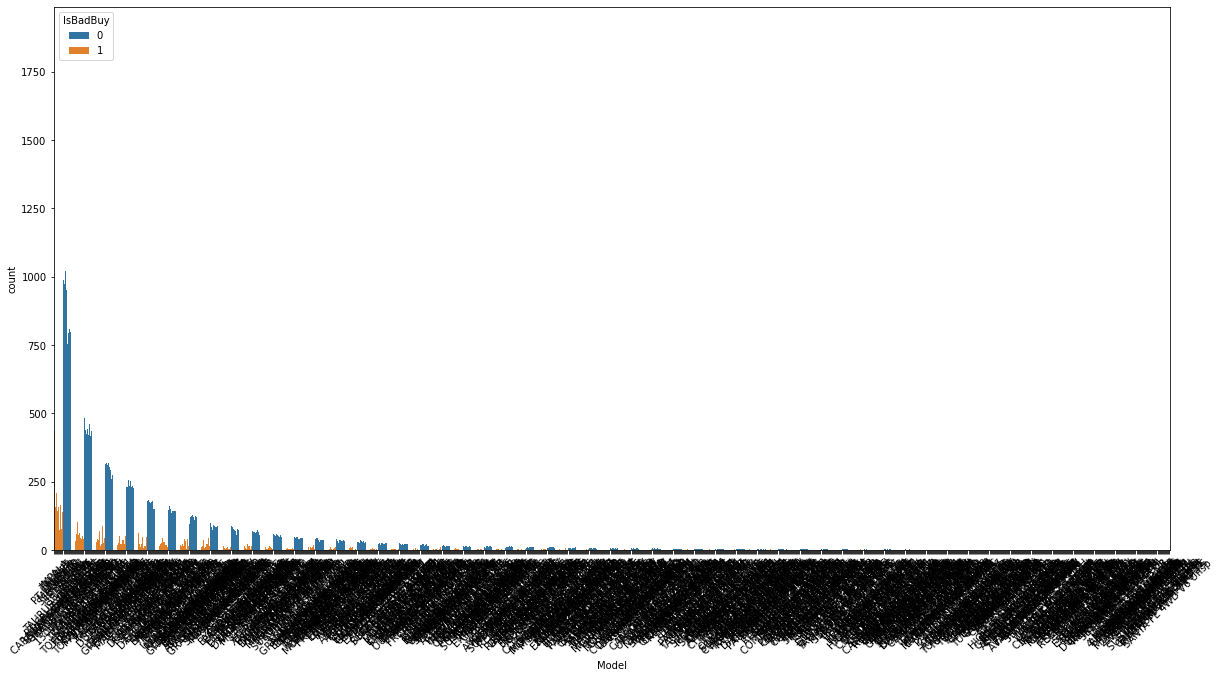

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


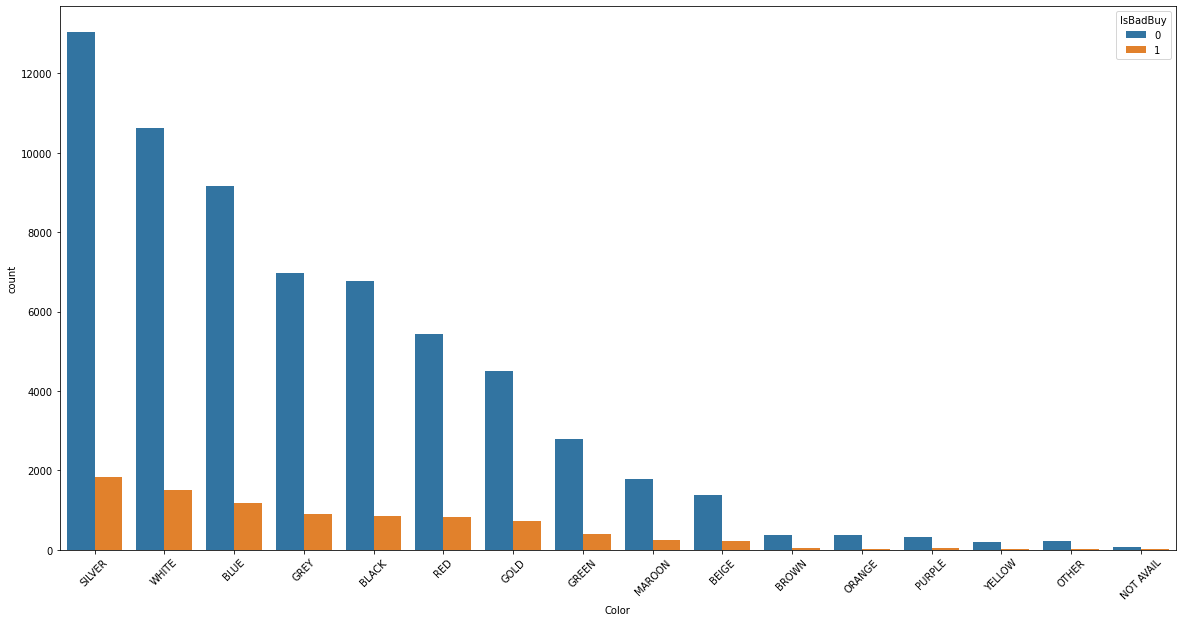

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


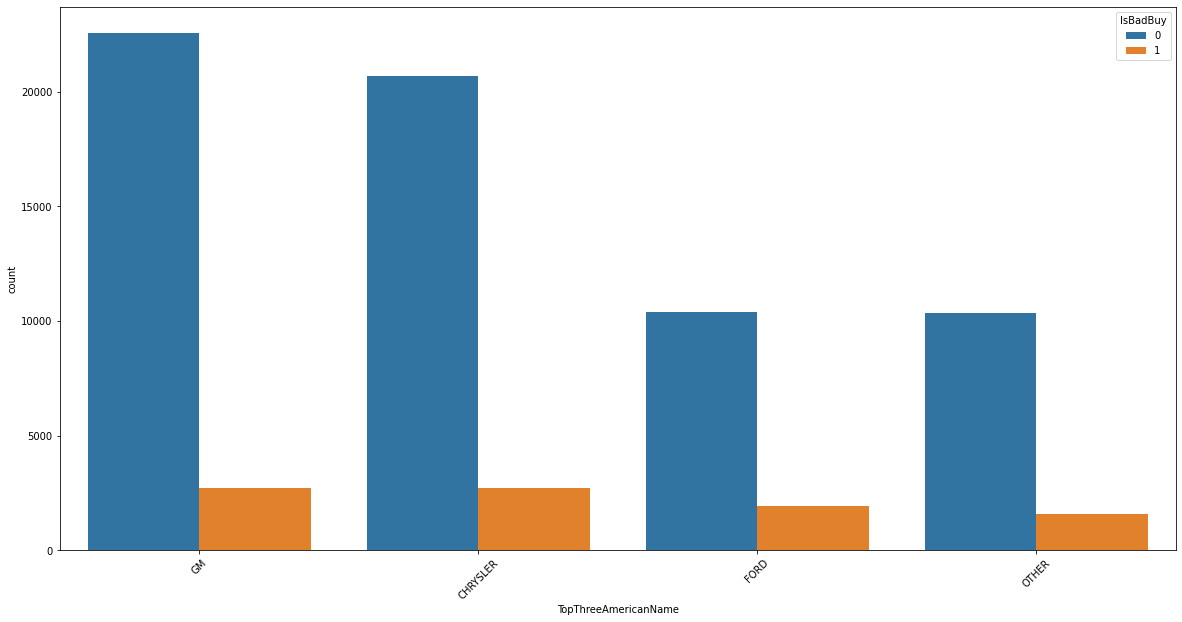

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


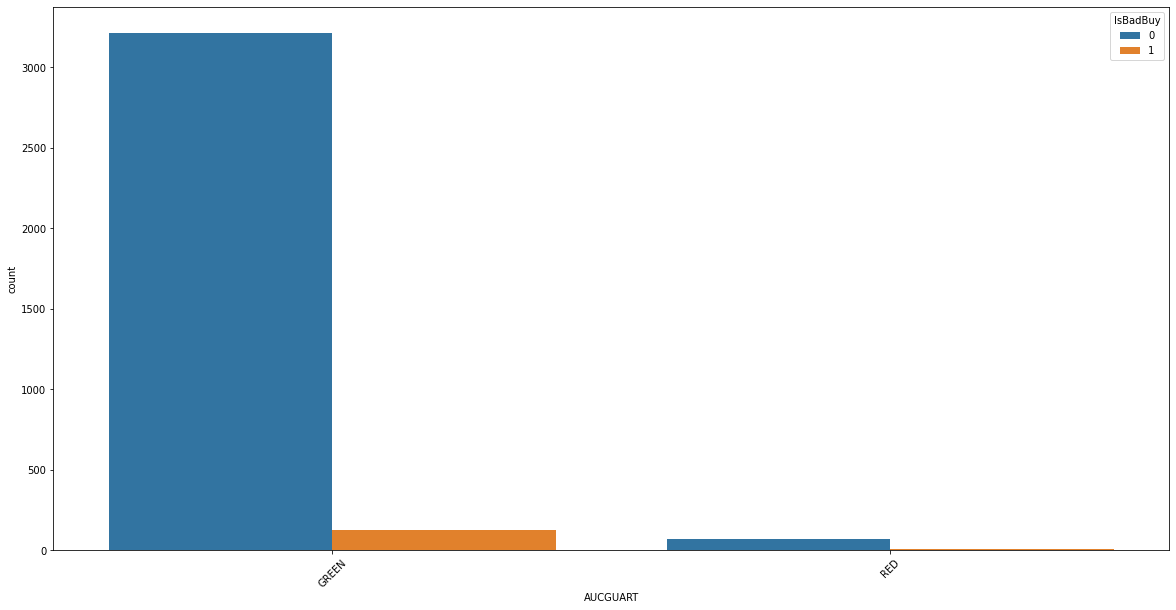

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


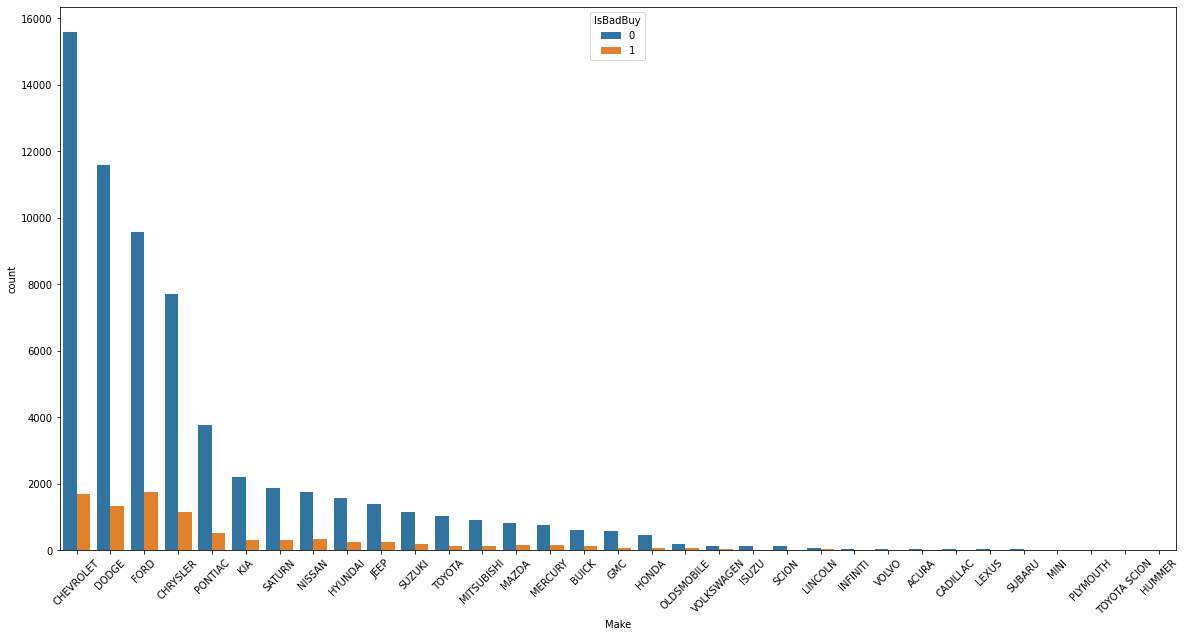

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


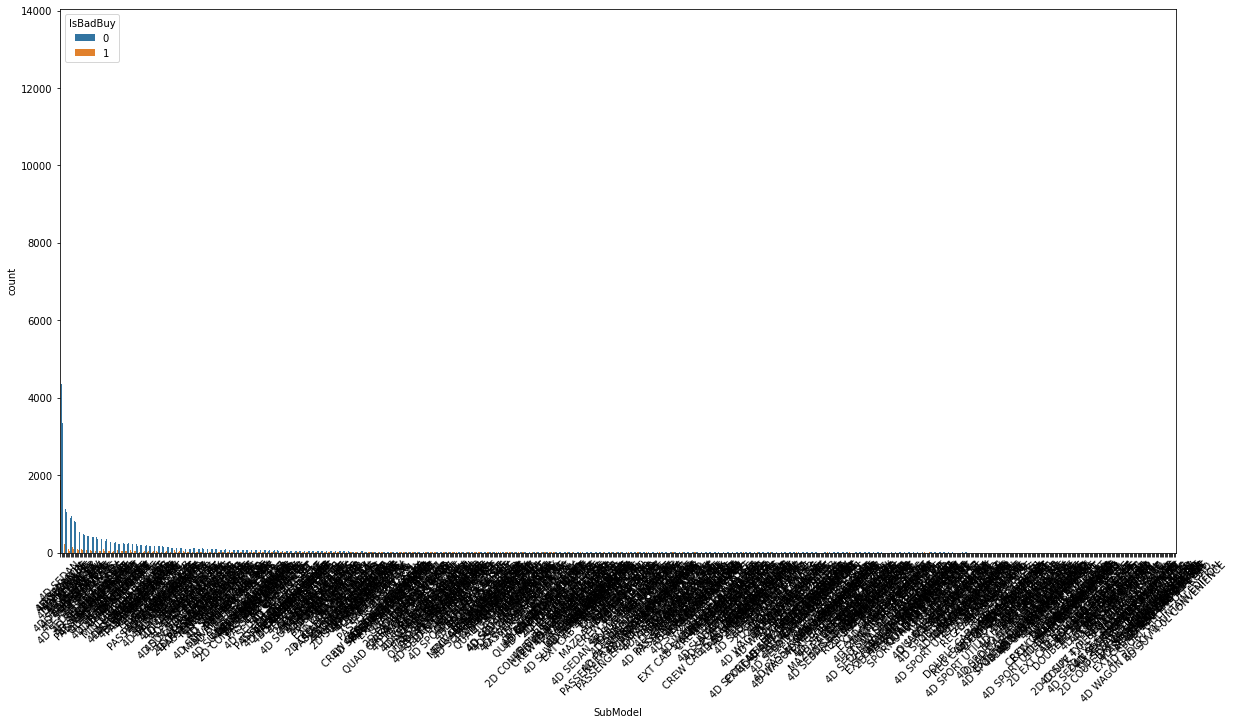

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


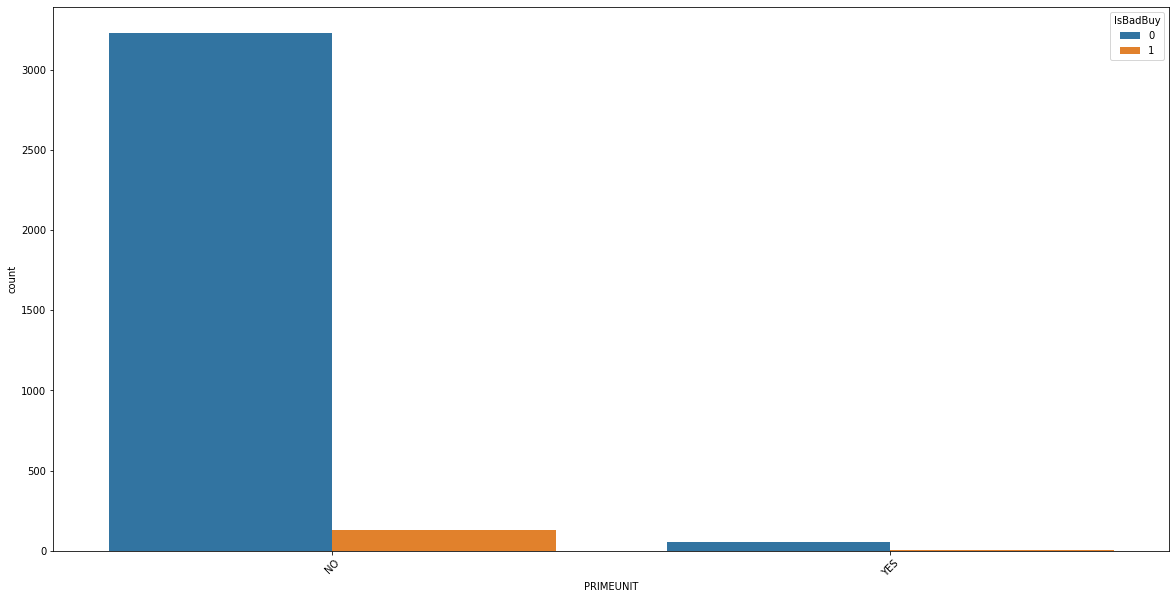

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


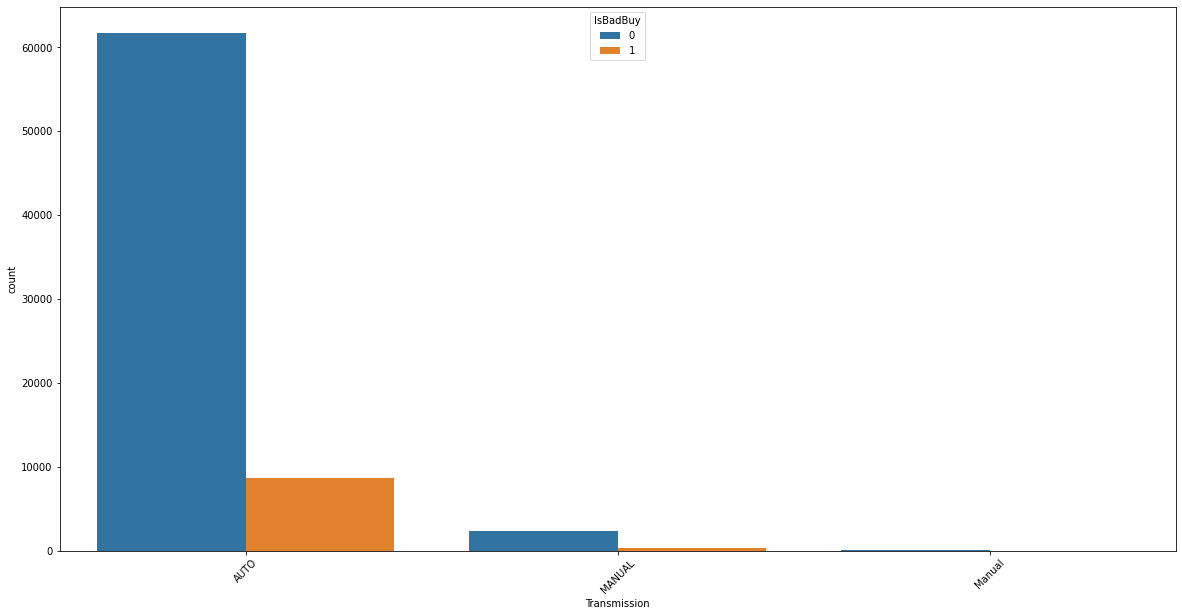

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


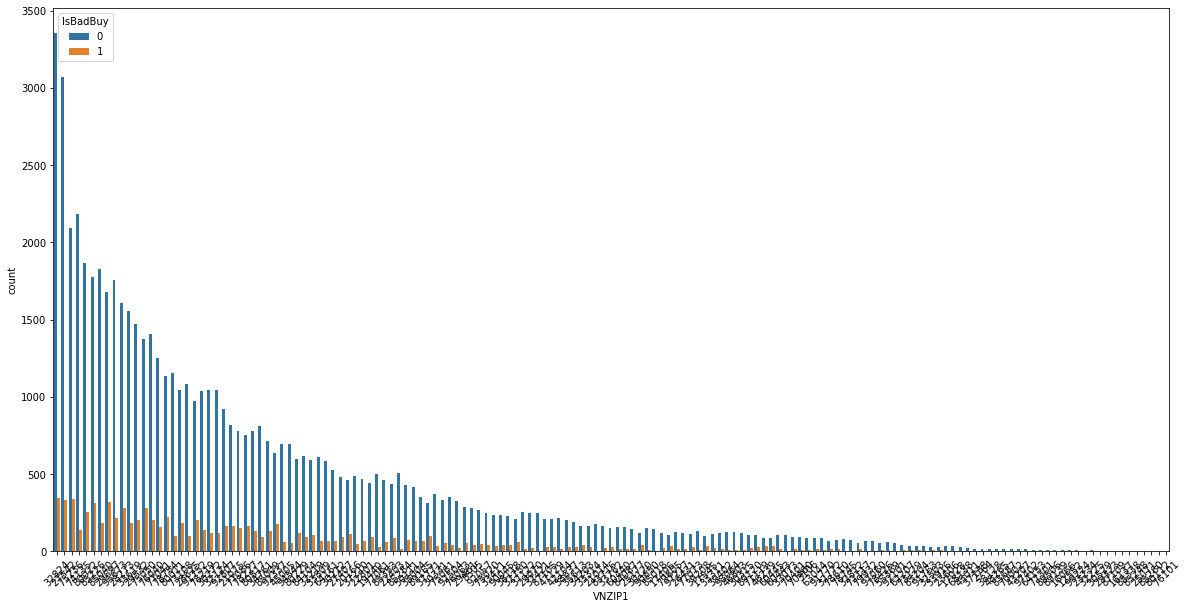

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


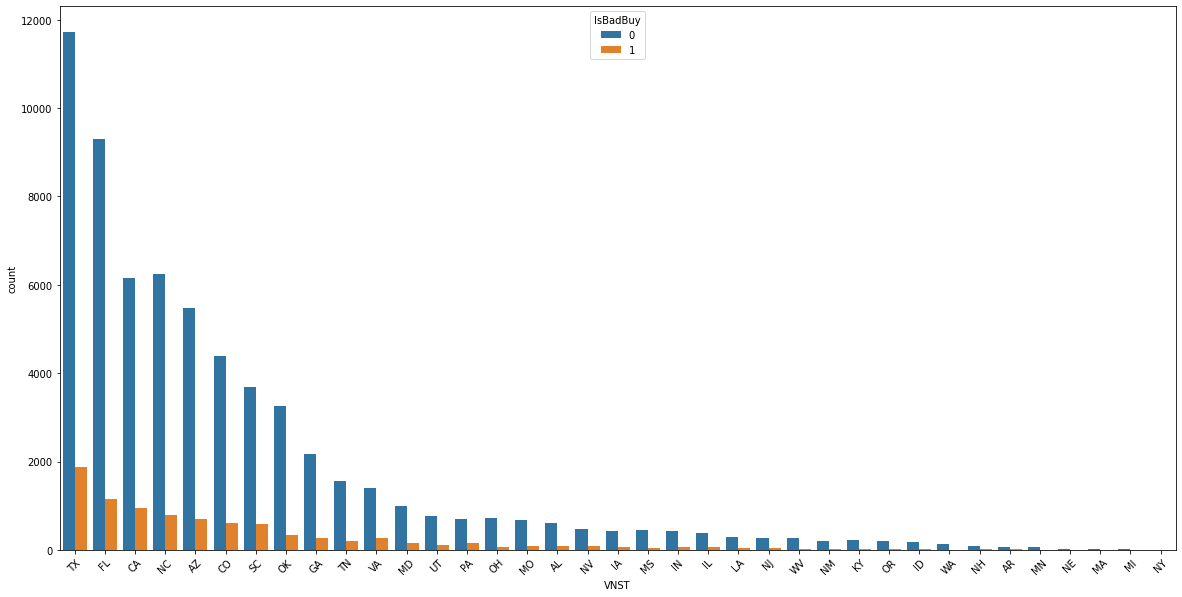

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


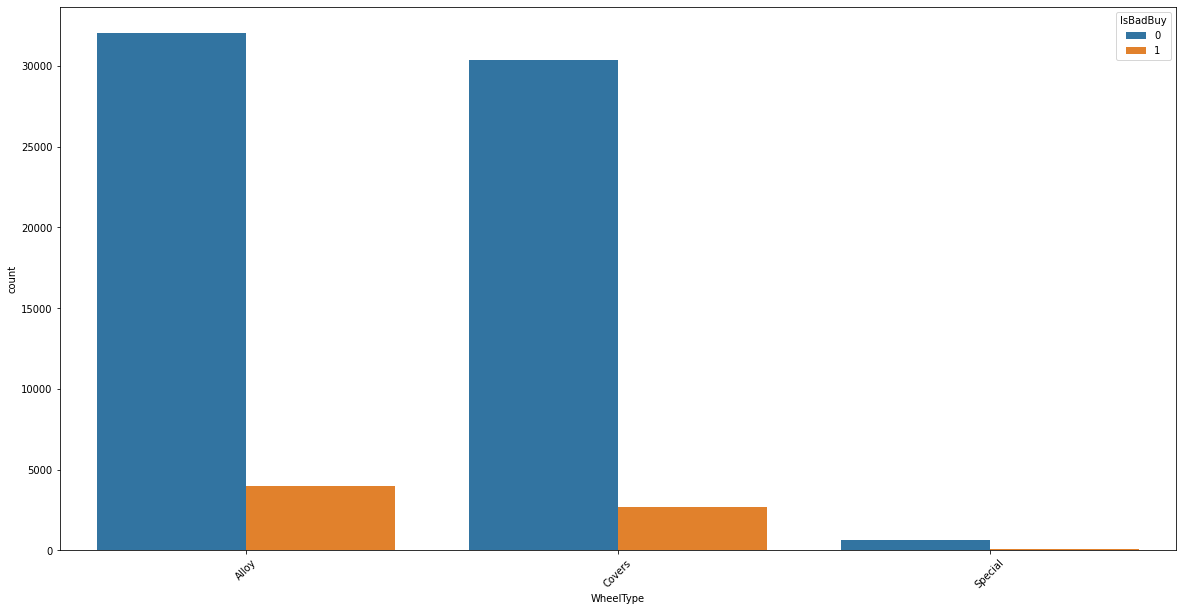

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


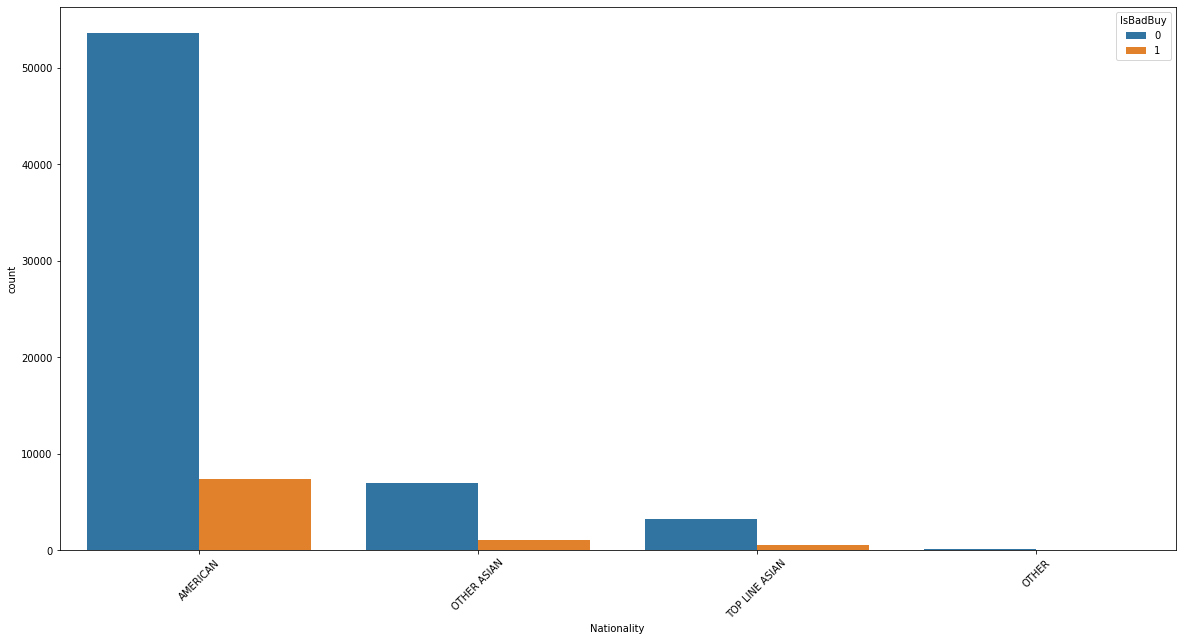

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


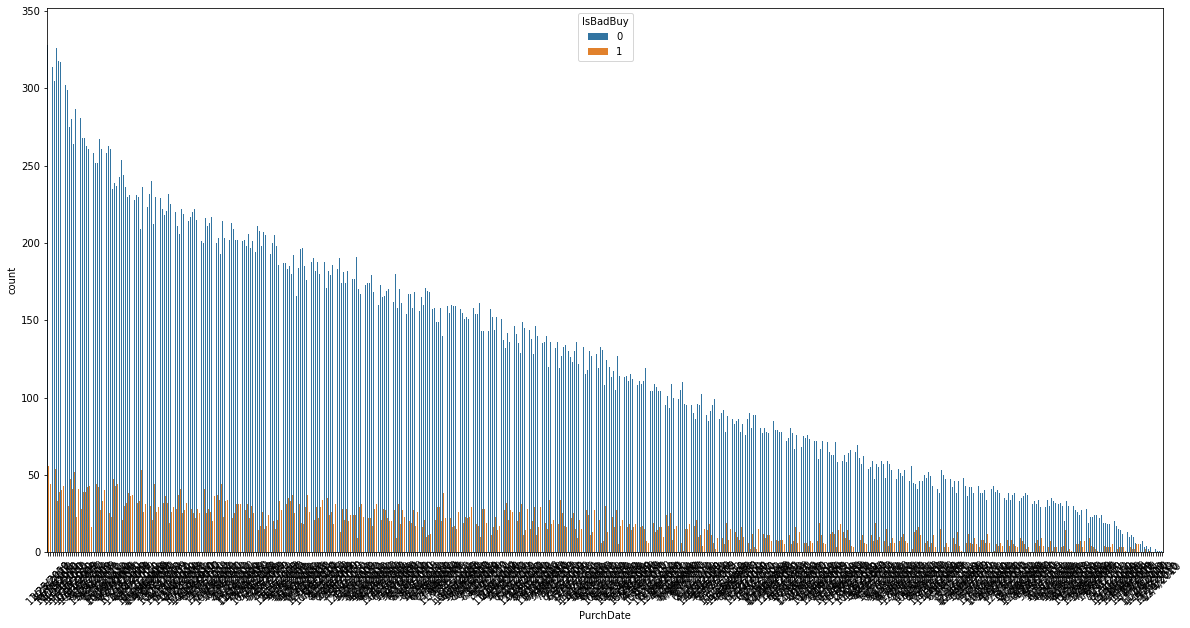

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


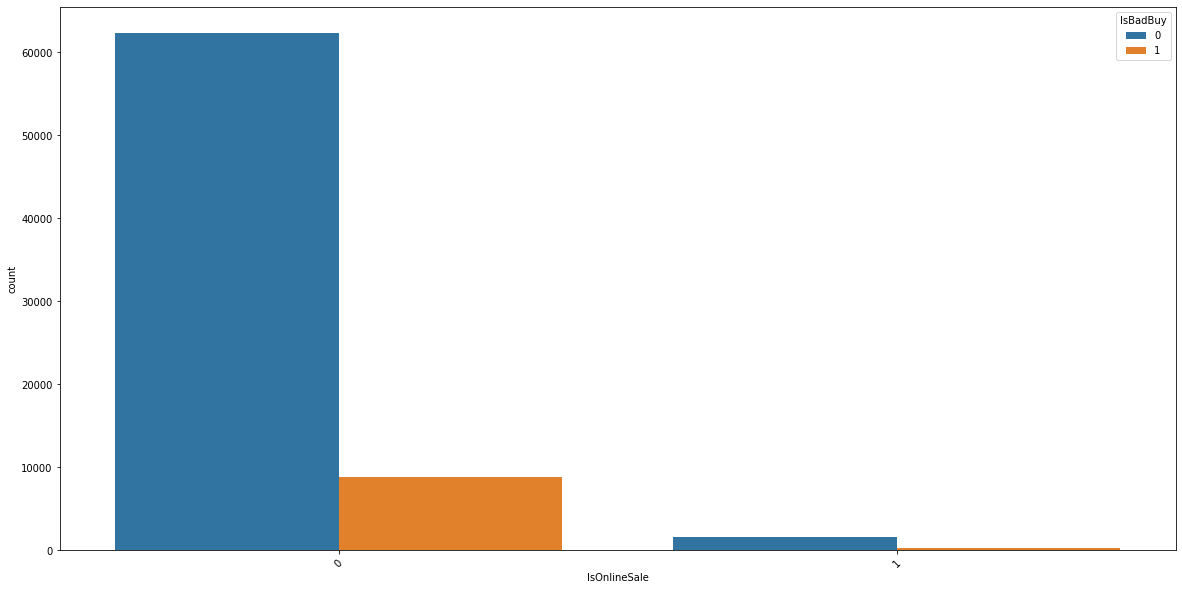

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


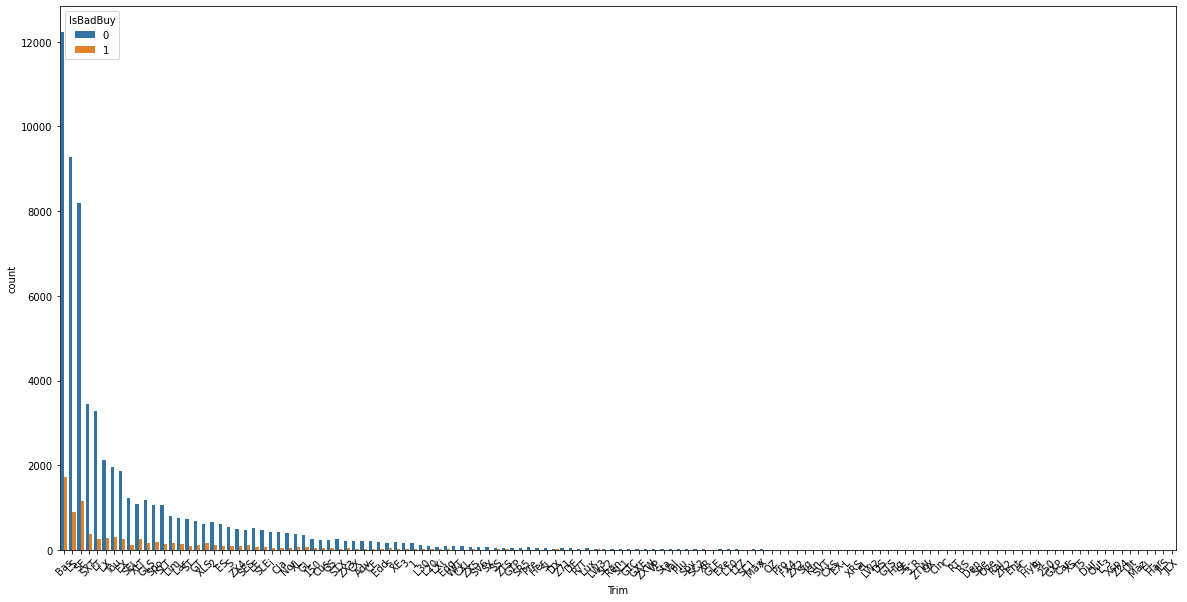

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


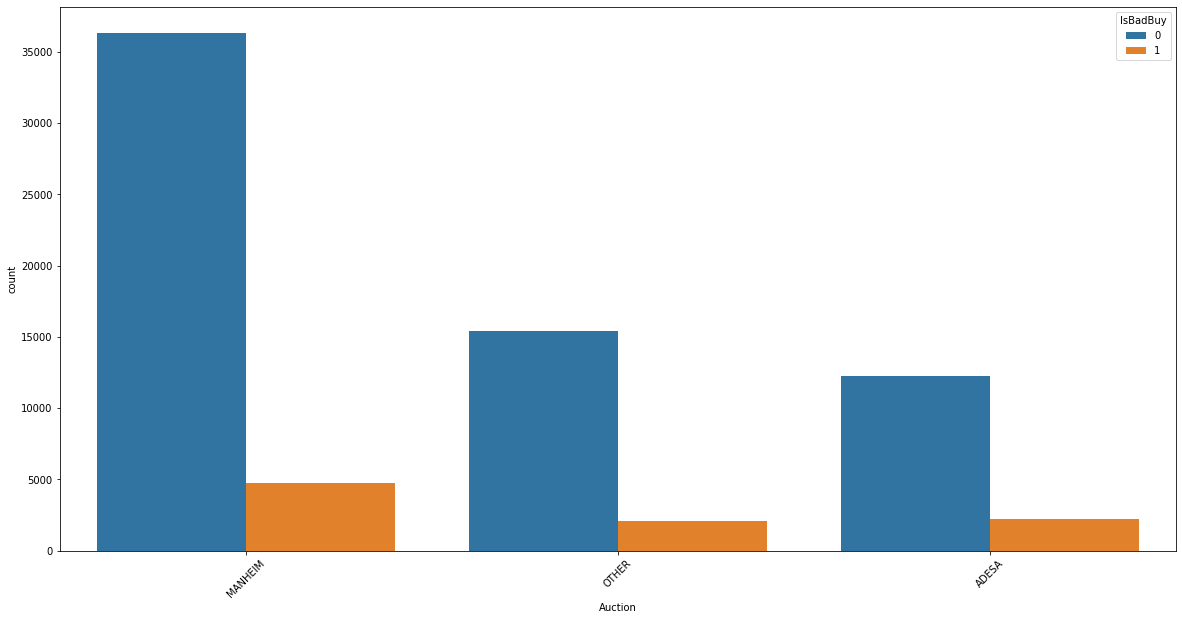

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


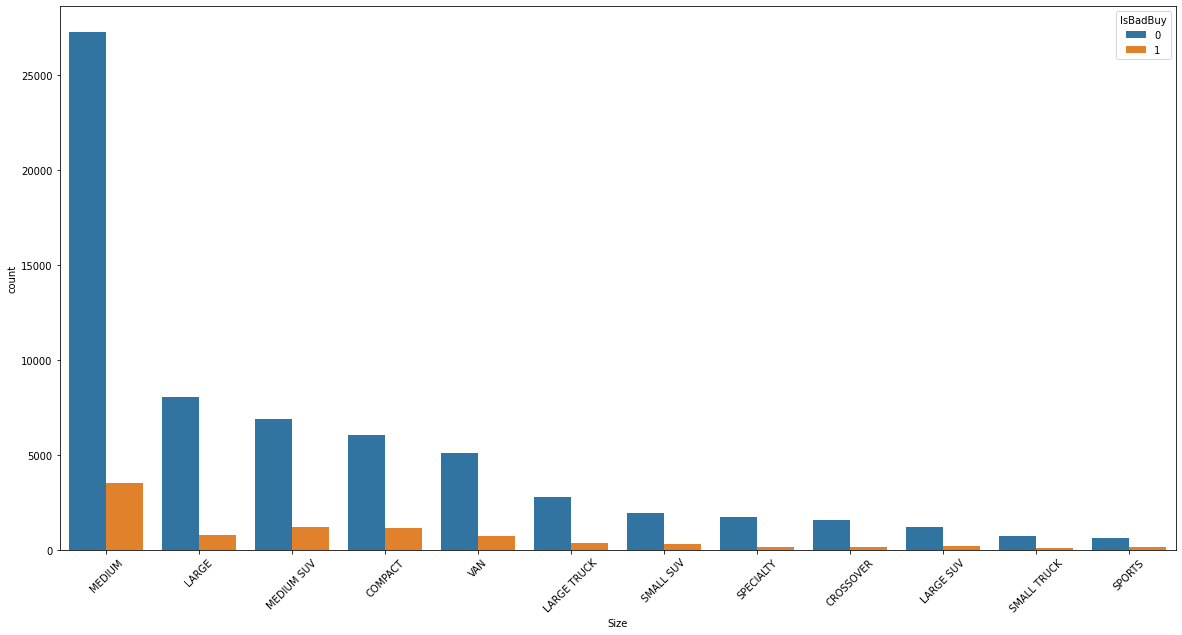

In [14]:
for e in catcol:
  plt.figure(figsize=(20,10))
  sns.countplot(df_train[e], order= df_train[e].value_counts().index, hue=df_train['IsBadBuy'])
  plt.xticks(rotation=45)
  plt.show()

categorical feature observations:

*  color : silver, white are most sold follow by blue , grey ,black,


red.. etc
* auction : manheim is most occuring auction provider
* primeunit : most vechiles have doesnt have higher demand than standard price (caution: most of the data is missing in this feature)
* aucguart : data missing in this feature but for remaining data green(auction has given guaranteed/arbitratable) is occuring more
* purchase date : convert to numerical feature using time series
* make: chervolet, dodge, ford , chrysler ,pontiac are most sold
* VNST : texas and florida has highest buyers
* topthreeamerican : gm(chervolet parent company),chrysler have more sales than ford and others
* transmission : auto has more sales (error check: MANUAL and Manual)
* Nationality : American dominates this auction sales, other asian has more sales than top line asian
* VNZIP1 : Further analysis required as it has more categories
* WheelType : alloy and wheel covers has almost equal sales(WheelTypeId is same as this drop this feature)
* IsSaleOnline : Most of the sales are offline
* Trim : further analysis required
* Size : mostly of auction buyers are interested in medium size vechicles
* submodel : further analysis required
* model : further analysis required

<h4>Numerical Features</h4>


> boxplot



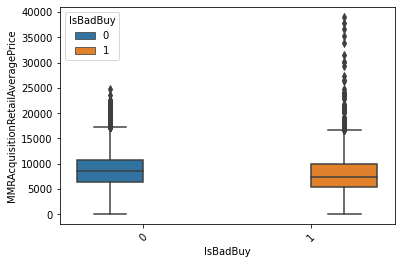

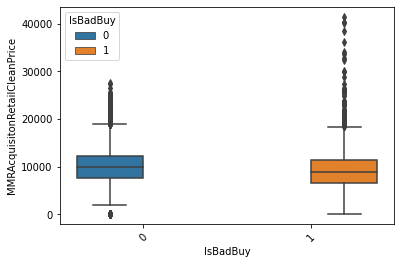

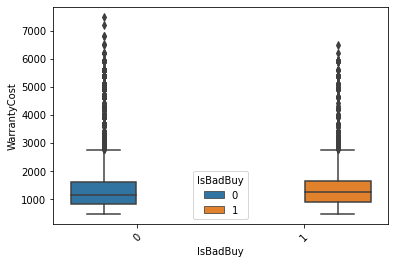

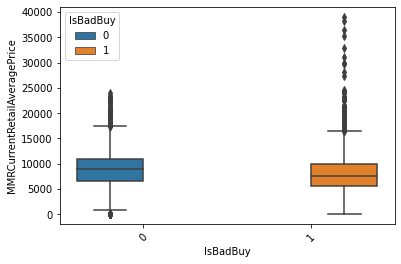

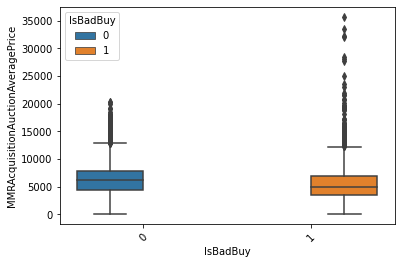

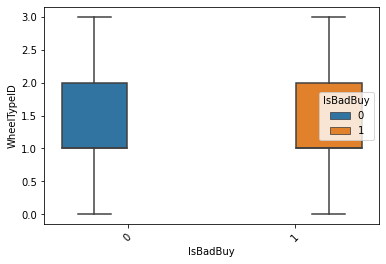

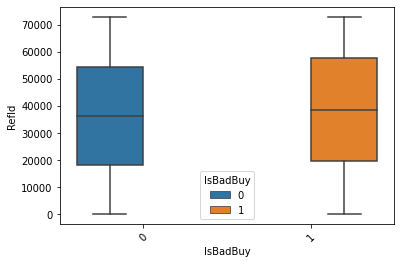

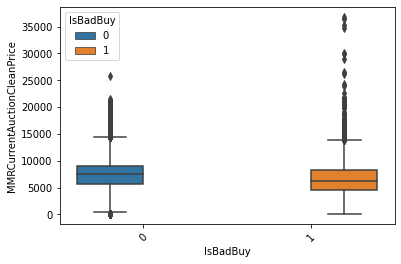

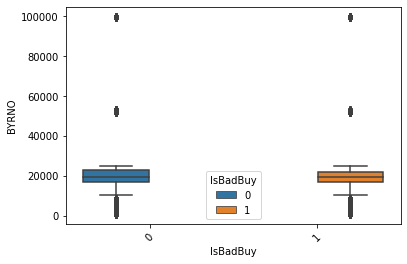

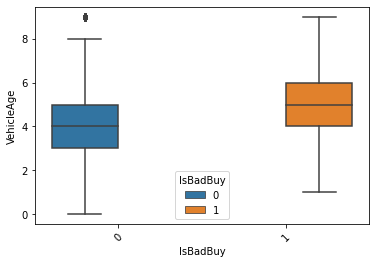

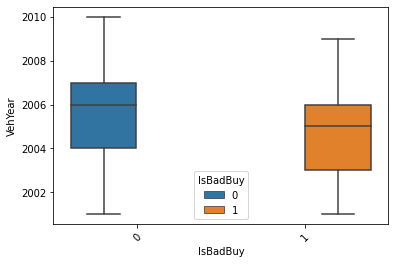

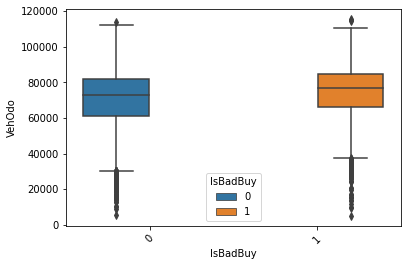

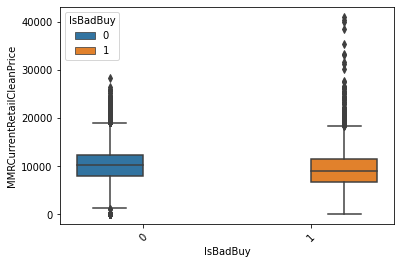

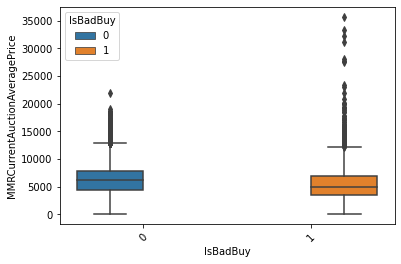

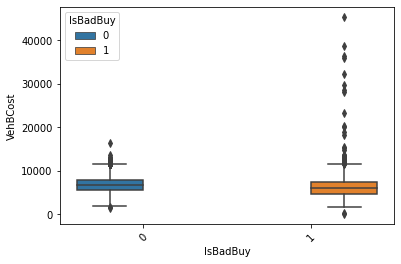

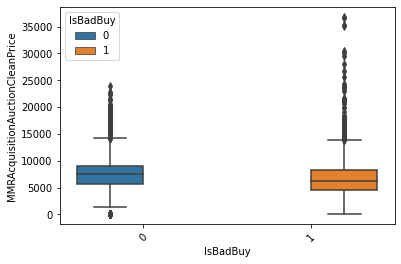

In [15]:
for e in numcol:
  plt.figure()
  sns.boxplot(data=df_train,y=e,x='IsBadBuy', hue= 'IsBadBuy')
  plt.xticks(rotation=45)
  plt.show()

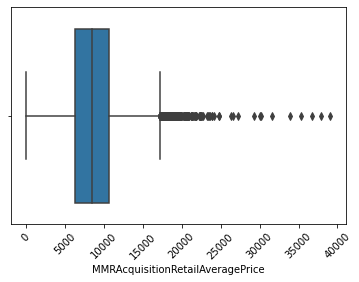

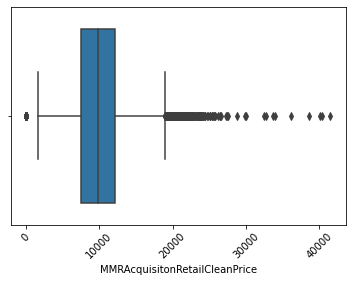

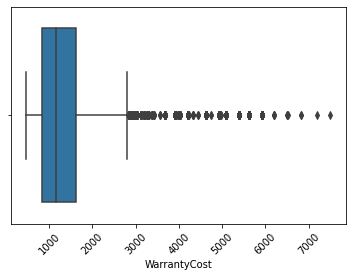

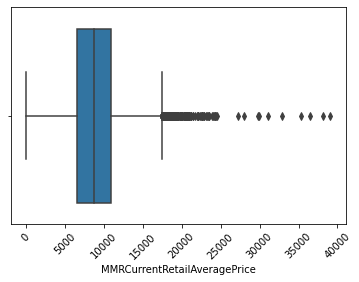

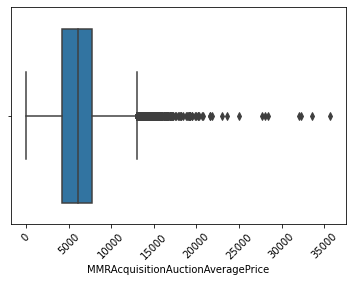

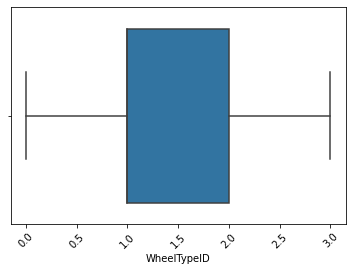

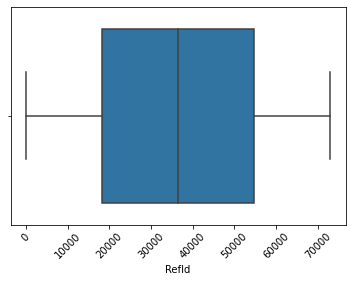

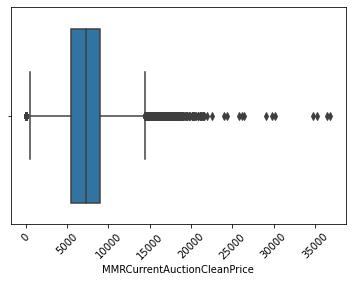

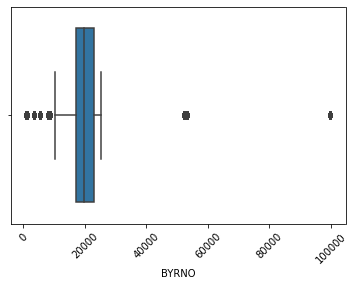

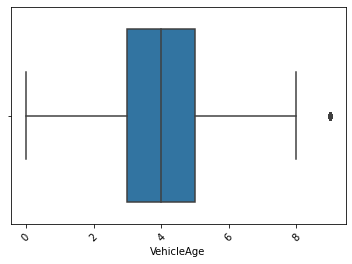

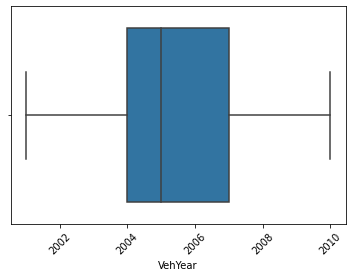

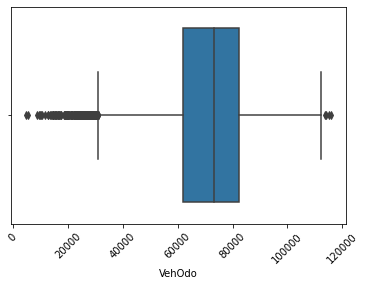

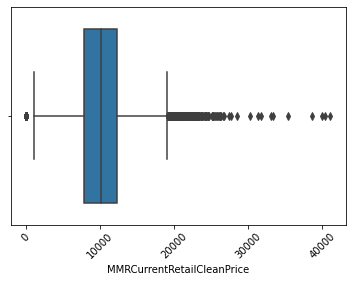

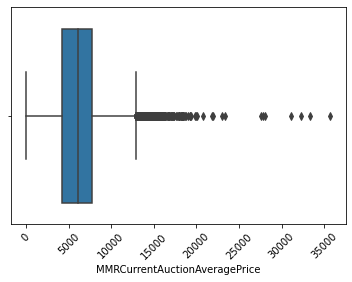

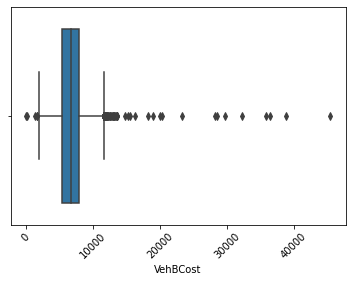

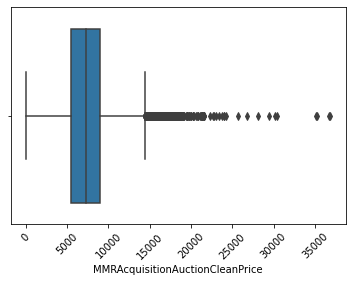

In [16]:
for e in numcol:
  plt.figure()
  sns.boxplot(data=df_train,x=e)
  plt.xticks(rotation=45)
  plt.show()

Observations:

>  vehicle age and veh year even though there is overlap for isbadbuy older vehicles are prone to be bad buy.





<h6>Date handling</h6>



> from date creating 2 new features 'PurMonth' for month of purchase and 'Purday' for day of week of purchase



In [17]:
df_train['PurMonth']=pd.to_datetime(df_train['PurchDate'], dayfirst=True).dt.month
df_test['PurMonth']=pd.to_datetime(df_test['PurchDate'], dayfirst=True).dt.month
df_train['Purday']=pd.to_datetime(df_train['PurchDate'], dayfirst=True).dt.day_name()
df_test['Purday']=pd.to_datetime(df_test['PurchDate'], dayfirst=True).dt.day_name()

In [18]:
print(df_train['PurMonth'].value_counts())
print(df_test['PurMonth'].value_counts())

10    7468
9     6862
4     6413
7     6313
8     6131
11    6083
2     5957
1     5931
3     5918
5     5506
6     5450
12    4951
Name: PurMonth, dtype: int64
10    5180
9     5074
8     4120
4     4063
2     4017
5     3959
11    3837
1     3835
7     3822
3     3822
6     3765
12    3213
Name: PurMonth, dtype: int64


In [19]:
print(df_train['Purday'].value_counts())
print(df_test['Purday'].value_counts())

Wednesday    18884
Tuesday      16279
Thursday     13380
Monday        9079
Friday        8455
Saturday      3881
Sunday        3025
Name: Purday, dtype: int64
Wednesday    11954
Tuesday      11006
Thursday     10432
Friday        5655
Monday        4765
Saturday      2848
Sunday        2047
Name: Purday, dtype: int64


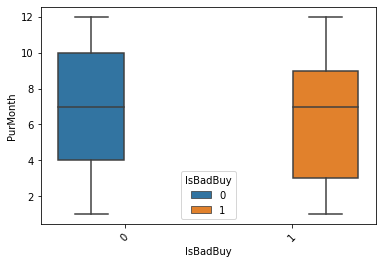

In [20]:
plt.figure()
sns.boxplot(data=df_train,y='PurMonth',x='IsBadBuy', hue= 'IsBadBuy')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


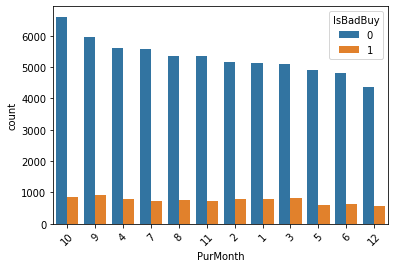

In [21]:
plt.figure()
sns.countplot(df_train['PurMonth'], order= df_train['PurMonth'].value_counts().index, hue=df_train['IsBadBuy'])
plt.xticks(rotation=45)
plt.show()

july ,august, sep, october has many purchases <br>
April has more purchases may be due to change in financial year 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


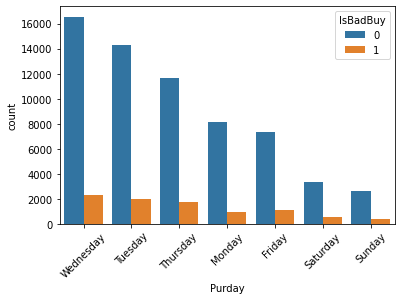

In [22]:
plt.figure()
sns.countplot(df_train['Purday'], order= df_train['Purday'].value_counts().index, hue=df_train['IsBadBuy'])
plt.xticks(rotation=45)
plt.show()


> A lot of purchase happened during mid week (tues- thrus)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


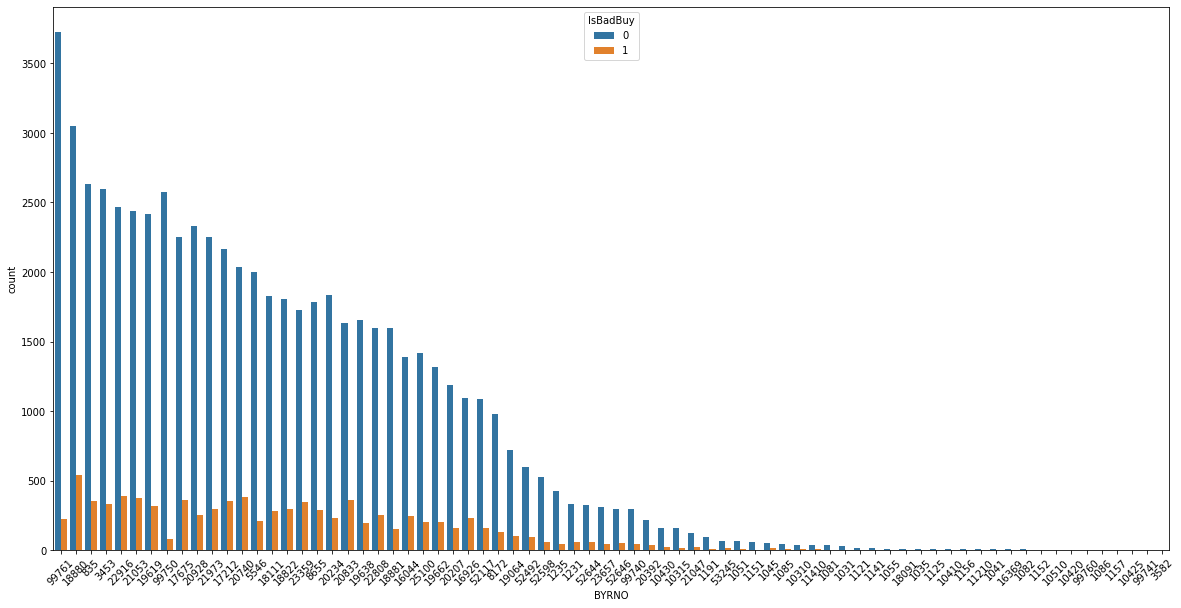

In [23]:
df_train['BYRNO'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(df_train['BYRNO'], order= df_train['BYRNO'].value_counts().index, hue=df_train['IsBadBuy'])
plt.xticks(rotation=45)
plt.show()

<h5>Col rearranging</h5>

In [24]:
catcol = list(set(catcol).union({'Purday','PurMonth','BYRNO'}) - {'PurchDate'})
print(catcol)

['Color', 'TopThreeAmericanName', 'Purday', 'Make', 'SubModel', 'VNST', 'WheelType', 'Transmission', 'Auction', 'Model', 'AUCGUART', 'PurMonth', 'BYRNO', 'PRIMEUNIT', 'VNZIP1', 'Nationality', 'Trim', 'IsOnlineSale', 'Size']


In [25]:
numcol = list(set(numcol)-{'BYRNO','RefId','WheelTypeID'})
print(numcol)

['WarrantyCost', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'VehicleAge', 'VehYear', 'VehOdo', 'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'VehBCost', 'MMRAcquisitionAuctionCleanPrice']


In [26]:
catcol = list(set(catcol)-{'PRIMEUNIT','AUCGUART'})
print(catcol)

['Color', 'TopThreeAmericanName', 'Purday', 'Make', 'SubModel', 'VNST', 'WheelType', 'Transmission', 'Auction', 'Model', 'PurMonth', 'BYRNO', 'VNZIP1', 'Nationality', 'Trim', 'IsOnlineSale', 'Size']


In [27]:
print("Numerical Columns :"+str( numcol) +"\n"+"Categorical Colums:"+ str(catcol))

Numerical Columns :['WarrantyCost', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'VehicleAge', 'VehYear', 'VehOdo', 'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'VehBCost', 'MMRAcquisitionAuctionCleanPrice']
Categorical Colums:['Color', 'TopThreeAmericanName', 'Purday', 'Make', 'SubModel', 'VNST', 'WheelType', 'Transmission', 'Auction', 'Model', 'PurMonth', 'BYRNO', 'VNZIP1', 'Nationality', 'Trim', 'IsOnlineSale', 'Size']


<h5>Correlation for numerical features</h5>

In [28]:
corr =df_train[list(set(numcol).union({'IsBadBuy'}))].corr()

corr.style.background_gradient(cmap='coolwarm')

,MMRCurrentAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost,MMRAcquisitonRetailCleanPrice,VehicleAge,VehYear,VehOdo,IsBadBuy,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,VehBCost,MMRAcquisitionAuctionCleanPrice
MMRCurrentAuctionCleanPrice,1.000000,0.849407,0.908669,-0.028131,0.855689,-0.532505,0.548426,0.012107,-0.104020,0.921536,0.990329,0.932492,0.775100,0.932114
MMRAcquisitionRetailAveragePrice,0.849407,1.000000,0.913108,-0.053444,0.990201,-0.460854,0.581191,0.031306,-0.087418,0.906054,0.851647,0.910391,0.746126,0.902718
MMRCurrentRetailAveragePrice,0.908669,0.913108,1.000000,-0.058025,0.903188,-0.504062,0.598490,0.015811,-0.103914,0.989760,0.915073,0.871755,0.756816,0.860716
WarrantyCost,-0.028131,-0.053444,-0.058025,1.000000,-0.026933,0.259310,-0.268696,0.411718,0.052319,-0.031683,-0.056798,-0.050417,-0.033210,-0.020644
MMRAcquisitonRetailCleanPrice,0.855689,0.990201,0.903188,-0.026933,1.000000,-0.426382,0.539230,0.063165,-0.083665,0.906810,0.846914,0.910187,0.744966,0.918242
VehicleAge,-0.532505,-0.460854,-0.504062,0.259310,-0.426382,1.000000,-0.957957,0.319794,0.167164,-0.469359,-0.575607,-0.565690,-0.312329,-0.518810
VehYear,0.548426,0.581191,0.598490,-0.268696,0.539230,-0.957957,1.000000,-0.283719,-0.158886,0.558669,0.590820,0.581146,0.349965,0.532927
VehOdo,0.012107,0.031306,0.015811,0.411718,0.063165,0.319794,-0.283719,1.000000,0.082560,0.048005,-0.028568,-0.017022,-0.062008,0.024617
IsBadBuy,-0.104020,-0.087418,-0.103914,0.052319,-0.083665,0.167164,-0.158886,0.082560,1.000000,-0.100245,-0.109112,-0.109252,-0.099911,-0.102954
MMRCurrentRetailCleanPrice,0.921536,0.906054,0.989760,-0.031683,0.906810,-0.469359,0.558669,0.048005,-0.100245,1.000000,0.912231,0.871042,0.756662,0.871203


<h6>Observations:</h6>

* 8 MMR prices are co related they might cause multicollinearilty problem
* NO Feature is correlated with target variable


In [29]:
df_train['MMRPrice'] = df_train['MMRAcquisitionAuctionAveragePrice']+df_train['MMRCurrentAuctionAveragePrice']+df_train['MMRAcquisitionAuctionCleanPrice']+df_train['MMRAcquisitionRetailAveragePrice']+df_train['MMRCurrentRetailCleanPrice']+df_train['MMRCurrentAuctionCleanPrice']+df_train['MMRAcquisitonRetailCleanPrice']+df_train['MMRCurrentRetailAveragePrice']
df_test['MMRPrice'] = df_test['MMRAcquisitionAuctionAveragePrice']+df_test['MMRCurrentAuctionAveragePrice']+df_test['MMRAcquisitionAuctionCleanPrice']+df_test['MMRAcquisitionRetailAveragePrice']+df_test['MMRCurrentRetailCleanPrice']+df_test['MMRCurrentAuctionCleanPrice']+df_test['MMRAcquisitonRetailCleanPrice']+df_test['MMRCurrentRetailAveragePrice']

In [30]:
numcol = list (set(numcol).union({'MMRPrice'})-{'MMRCurrentRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'MMRAcquisitionRetailAveragePrice','MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
 'MMRCurrentAuctionAveragePrice'})
print(numcol)

['WarrantyCost', 'VehicleAge', 'VehYear', 'VehOdo', 'MMRPrice', 'VehBCost']


Correlation after feat engineering new feature from existing feature

In [31]:
corr =df_train[list(set(numcol).union({'IsBadBuy'}))].corr()
corr.style.background_gradient(cmap='coolwarm')

,VehBCost,MMRPrice,WarrantyCost,IsBadBuy,VehicleAge,VehYear,VehOdo
VehBCost,1.000000,0.796218,-0.033210,-0.099911,-0.312329,0.349965,-0.062008
MMRPrice,0.796218,1.000000,-0.041914,-0.103297,-0.521879,0.589221,0.023437
WarrantyCost,-0.033210,-0.041914,1.000000,0.052319,0.259310,-0.268696,0.411718
IsBadBuy,-0.099911,-0.103297,0.052319,1.000000,0.167164,-0.158886,0.082560
VehicleAge,-0.312329,-0.521879,0.259310,0.167164,1.000000,-0.957957,0.319794
VehYear,0.349965,0.589221,-0.268696,-0.158886,-0.957957,1.000000,-0.283719
VehOdo,-0.062008,0.023437,0.411718,0.082560,0.319794,-0.283719,1.000000


In [32]:
X_train = df_train[list(set(numcol).union(set(catcol)))]
X_test = df_test[list(set(numcol).union(set(catcol)))]
y_train = df_train['IsBadBuy']

In [33]:
X_test.shape

(48707, 23)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X_train, y_train, test_size=0.33, random_state=42)

In [35]:
print(X_train.shape,X_cv.shape,y_train.shape,y_cv.shape)

(48898, 23) (24085, 23) (48898,) (24085,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


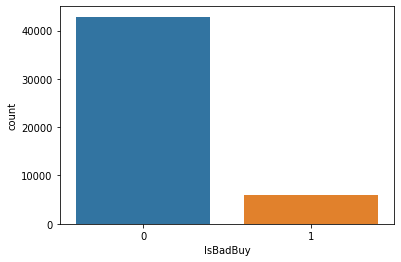

In [36]:
sns.countplot(y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


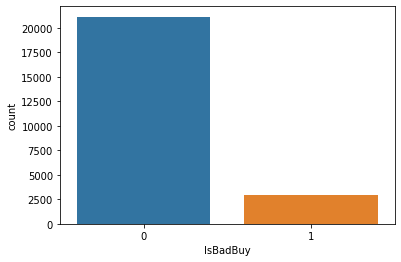

In [37]:
sns.countplot(y_cv)
plt.show()

In [38]:
def shap():
  print('Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :')
  print(X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape)
  return

<h4>Missing Data Handling</h4>

In [39]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent',copy=True)
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median',copy=True)

In [40]:
X_train[catcol] = imputer1.fit_transform(X_train[catcol])
X_cv[catcol] = imputer1.transform(X_cv[catcol]) 
X_test[catcol] = imputer1.transform(X_test[catcol])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [41]:
print(X_train[catcol].isnull().sum())
print(X_cv[catcol].isnull().sum())
print(X_test[catcol].isnull().sum())

Color                   0
TopThreeAmericanName    0
Purday                  0
Make                    0
SubModel                0
VNST                    0
WheelType               0
Transmission            0
Auction                 0
Model                   0
PurMonth                0
BYRNO                   0
VNZIP1                  0
Nationality             0
Trim                    0
IsOnlineSale            0
Size                    0
dtype: int64
Color                   0
TopThreeAmericanName    0
Purday                  0
Make                    0
SubModel                0
VNST                    0
WheelType               0
Transmission            0
Auction                 0
Model                   0
PurMonth                0
BYRNO                   0
VNZIP1                  0
Nationality             0
Trim                    0
IsOnlineSale            0
Size                    0
dtype: int64
Color                   0
TopThreeAmericanName    0
Purday                  0
Make        

In [42]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(48898, 23) (24085, 23) (48898,) (24085,) (48707, 23)


In [43]:
X_train[numcol] = imputer2.fit_transform(X_train[numcol])
X_cv[numcol] = imputer2.transform(X_cv[numcol]) 
X_test[numcol] = imputer2.transform(X_test[numcol])
print(X_train[numcol].isnull().sum())
print(X_cv[numcol].isnull().sum())
print(X_test[numcol].isnull().sum())

WarrantyCost    0
VehicleAge      0
VehYear         0
VehOdo          0
MMRPrice        0
VehBCost        0
dtype: int64
WarrantyCost    0
VehicleAge      0
VehYear         0
VehOdo          0
MMRPrice        0
VehBCost        0
dtype: int64
WarrantyCost    0
VehicleAge      0
VehYear         0
VehOdo          0
MMRPrice        0
VehBCost        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [44]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(48898, 23) (24085, 23) (48898,) (24085,) (48707, 23)


<h5>Normalising numerical features</h5>

In [45]:
for e in numcol:
  print(e,X_train[e].skew())

WarrantyCost 2.101218573619551
VehicleAge 0.3905408538761093
VehYear -0.33259751292169437
VehOdo -0.4527278010649463
MMRPrice 0.36422872398583134
VehBCost 0.6125576305893266


lot of skewed data is present which could effect models as basic assumption for machine learning models is features following gaussian distribution

In [46]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train[numcol]=pt.fit_transform(X_train[numcol])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


<h6>Comment</h6>

box cox but it strictly supports positves values , but yeo-johnson method supports both positive and negative values (default in case of powertransformer)

In [47]:
X_cv[numcol]=pt.transform(X_cv[numcol])
X_test[numcol]=pt.transform(X_test[numcol])
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(48898, 23) (24085, 23) (48898,) (24085,) (48707, 23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [48]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(48898, 23) (24085, 23) (48898,) (24085,) (48707, 23)


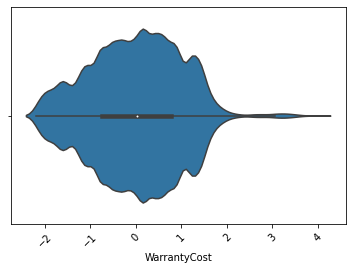

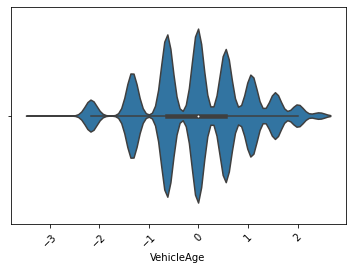

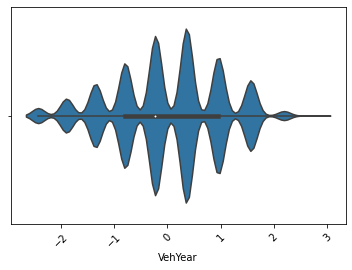

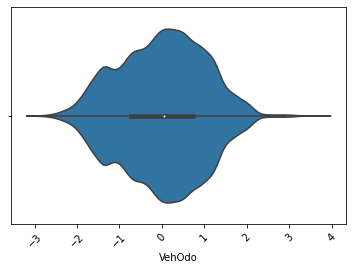

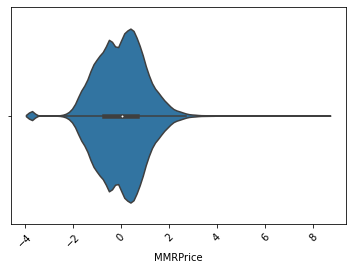

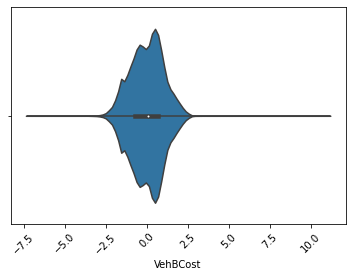

In [49]:
for e in numcol:
  plt.figure()
  sns.violinplot(data=X_train,x=e)
  plt.xticks(rotation=45)
  plt.show()

<h5>Removing Outliers using IQR Method</h5>

In [50]:
def outliers(df,feat):
  q1=df[feat].quantile(0.25)
  q3=df[feat].quantile(0.75)
  iqr = q3-q1

  low_bound = q1 - 1.5*iqr
  upp_bound = q3 + 1.5*iqr

  ls = df.index[(df[feat]<low_bound) | (df[feat]>upp_bound)]

  return ls

In [51]:
index_list =[]
for e in numcol:
  index_list.extend(outliers(X_train,e))

In [52]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df 

In [53]:
len(index_list)

1248

Data after removing outliers

In [54]:
X_train =  remove(X_train,index_list)
y_train = remove(y_train,index_list)

In [55]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(47694, 23) (24085, 23) (47694,) (24085,) (48707, 23)


<h4>Preprocessing</h4>

*  As Data contains only categorical and numerical features
*  Creating Transformer for specific columns kinds 
* final data is ndarray

In [56]:
from imblearn.over_sampling import SMOTE 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [57]:
preprocessor = ColumnTransformer(
    [
     ('onehot',OneHotEncoder(handle_unknown='ignore'),catcol),
     ('scaler',StandardScaler(), numcol)
    ]
)

In [58]:
X_train = preprocessor.fit_transform(X_train)
X_cv = preprocessor.transform(X_cv)
X_test = preprocessor.transform(X_test)

In [59]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(47694, 2199) (24085, 2199) (47694,) (24085,) (48707, 2199)


<h5>Balancing the data</h5>

using SMOTE to oversample the data to not loss information

In [60]:
sm =SMOTE()
X_train , y_train = sm.fit_resample(X_train,y_train)

In [61]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(83908, 2199) (24085, 2199) (83908,) (24085,) (48707, 2199)


In [62]:
y_train.value_counts()

1    41954
0    41954
Name: IsBadBuy, dtype: int64

<h4>Feature Reduction</h4>

* using truncated svd to reduce the dimensions without lossing gainful information
* curtailed features to 200 only due to runtime limitations of the machine

In [63]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
X_train = svd.fit_transform(X_train)
X_cv = svd.transform(X_cv)
X_test = svd.transform(X_test)
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(83908, 200) (24085, 200) (83908,) (24085,) (48707, 200)


scaling before model fitting

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(83908, 200) (24085, 200) (83908,) (24085,) (48707, 200)


metrics function

In [65]:
from sklearn.metrics import precision_score ,recall_score , confusion_matrix , f1_score, accuracy_score
from sklearn.metrics import classification_report
def met(y_pred,y_true):
    print("accuracy:"+ str(accuracy_score(y_pred,y_true)))
    print("Precesion:"+ str(precision_score(y_pred,y_true)))
    print("Recall:"+ str(recall_score(y_pred,y_true)))
    print("F1 Score:"+str(f1_score(y_pred,y_true)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_pred,y_true))
    return

SVM model

In [66]:
from sklearn.svm import SVC
sv = SVC(verbose=True, class_weight='balanced',max_iter=10000,random_state=42)
sv.fit(X_train,y_train)
y_pred = sv.predict(X_train)
print("Train metrics")
met(y_pred,y_train)
print("___________******************************____________")
print(classification_report(y_pred,y_train))
print("___________******************************____________")
y_pred = sv.predict(X_cv)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Train metrics
accuracy:0.9672617628831578
Precesion:0.965652857891977
Recall:0.9687701762356823
F1 Score:0.9672090052881
Confusion Matrix:
[[40648  1441]
 [ 1306 40513]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42089
           1       0.97      0.97      0.97     41819

    accuracy                           0.97     83908
   macro avg       0.97      0.97      0.97     83908
weighted avg       0.97      0.97      0.97     83908

___________******************************____________
Cross Validation Metrics
accuracy:0.8208428482457961
Precesion:0.2087015635622026
Recall:0.23606305267204922
F1 Score:0.2215406819411871
Confusion Matrix:
[[19156  2328]
 [ 1987   614]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     21484
           1       0.21      0.24      0.22   

Gaussian Naive Bayes model

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_train)
print("Train metrics")
met(y_pred,y_train)
print("___________******************************____________")
print(classification_report(y_pred,y_train))
print("___________******************************____________")
y_pred = gnb.predict(X_cv)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

Train metrics
accuracy:0.6546574820040997
Precesion:0.7057491538351528
Recall:0.6403191972491944
F1 Score:0.6714439594081297
Confusion Matrix:
[[25322 12345]
 [16632 29609]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.60      0.67      0.64     37667
           1       0.71      0.64      0.67     46241

    accuracy                           0.65     83908
   macro avg       0.65      0.66      0.65     83908
weighted avg       0.66      0.65      0.66     83908

___________******************************____________
Cross Validation Metrics
accuracy:0.5812746522731991
Precesion:0.4850441876274643
Recall:0.14274282284685405
F1 Score:0.22057346008192286
Confusion Matrix:
[[12573  1515]
 [ 8570  1427]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.59      0.89      0.71     14088
           1       0.49      0.14      0.

Logistic Regression model

In [68]:
from sklearn.linear_model import LogisticRegression
LG1 = LogisticRegression().fit(X_train,y_train)
y_pred = LG1.predict(X_train)
print("Train metrics")
met(y_pred,y_train)
print("___________******************************____________")
print(classification_report(y_pred,y_train))
print("___________******************************____________")
y_pred = LG1.predict(X_cv)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train metrics
accuracy:0.6612599513753158
Precesion:0.6839157172140916
Recall:0.654269752593775
F1 Score:0.6687643487279888
Confusion Matrix:
[[26792 13261]
 [15162 28693]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     40053
           1       0.68      0.65      0.67     43855

    accuracy                           0.66     83908
   macro avg       0.66      0.66      0.66     83908
weighted avg       0.66      0.66      0.66     83908

___________******************************____________
Cross Validation Metrics
accuracy:0.6291052522316795
Precesion:0.6600951733514616
Recall:0.19665822784810127
F1 Score:0.303035031598658
Confusion Matrix:
[[13210  1000]
 [ 7933  1942]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.62      0.93      0.75     14210
           1       0.66      0.20      0.30 

Random Forest model

In [69]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred = RF.predict(X_train)
print("Train metrics")
met(y_pred,y_train)
print("___________******************************____________")
print(classification_report(y_pred,y_train))
print("___________******************************____________")
y_pred = RF.predict(X_cv)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

Train metrics
accuracy:1.0
Precesion:1.0
Recall:1.0
F1 Score:1.0
Confusion Matrix:
[[41954     0]
 [    0 41954]]
___________******************************____________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41954
           1       1.00      1.00      1.00     41954

    accuracy                           1.00     83908
   macro avg       1.00      1.00      1.00     83908
weighted avg       1.00      1.00      1.00     83908

___________******************************____________
Cross Validation Metrics
accuracy:0.8552210919659539
Precesion:0.11794697484704283
Recall:0.2800645682001614
F1 Score:0.16598899784740495
Confusion Matrix:
[[20251  2595]
 [  892   347]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     22846
           1       0.12      0.28      0.17      1239

    accuracy                           0.86   

Grid Search for Logistic Model

In [70]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression(max_iter=500,solver='saga',l1_ratio=0.4)
parameters = {'penalty':('l2','elasticnet'),'C':[1,10]}
clf = GridSearchCV(LR,parameters,n_jobs=-1,error_score='raise',verbose=4,cv=3)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'C': 10, 'penalty': 'elasticnet'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Logistic model for best hyperparamaeters

In [71]:
LR = LogisticRegression(max_iter=500,solver='saga',l1_ratio=0.4,penalty='elasticnet',C=10,n_jobs=-1)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_train)
print("Train metrics")
met(y_pred,y_train)
print("___________******************************____________")
print(classification_report(y_pred,y_train))
print("___________******************************____________")
y_pred = LR.predict(X_cv)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Train metrics
accuracy:0.6611765266720694
Precesion:0.6838442103255947
Recall:0.6541864283108355
F1 Score:0.6686866332595269
Confusion Matrix:
[[26788 13264]
 [15166 28690]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     40052
           1       0.68      0.65      0.67     43856

    accuracy                           0.66     83908
   macro avg       0.66      0.66      0.66     83908
weighted avg       0.66      0.66      0.66     83908

___________******************************____________
Cross Validation Metrics
accuracy:0.6294789287938551
Precesion:0.6580557443915703
Recall:0.19646843921250254
F1 Score:0.3025945608002501
Confusion Matrix:
[[13225  1006]
 [ 7918  1936]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.63      0.93      0.75     14231
           1       0.66      0.20      0.3



1.   Recall Score is low for Isbadbuy as basic assumption for any error analysis is it is balanced 1, 0 for cross validation also
2.   A lot of unsatisfied customers are predicted as satisfied



In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 406048236056941621
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2730258782710398293
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(200,)))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu', kernel_regularizer=keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               51456     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dropout_11 (Dropout)        (None, 32)               

In [ ]:
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_cv,y_cv),
                 epochs = 100,
                 batch_size = 32,class_weight={0: 1., 1: 3.})

Epoch 1/100
2623/2623 [==============================] - 11s 4ms/step - loss: 1.7089 - accuracy: 0.5007 - val_loss: 1.5103 - val_accuracy: 0.1221
Epoch 2/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.2873 - accuracy: 0.5161 - val_loss: 1.3040 - val_accuracy: 0.2173
Epoch 3/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.1857 - accuracy: 0.5541 - val_loss: 1.3479 - val_accuracy: 0.2039
Epoch 4/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.1401 - accuracy: 0.5758 - val_loss: 1.1482 - val_accuracy: 0.3120
Epoch 5/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.1169 - accuracy: 0.5857 - val_loss: 1.2719 - val_accuracy: 0.2646
Epoch 6/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.0986 - accuracy: 0.5936 - val_loss: 1.2263 - val_accuracy: 0.2855
Epoch 7/100
2623/2623 [==============================] - 11s 4ms/step - loss: 1.0799 - accuracy: 0.6043 - val_loss: 1.2446 - val_

In [ ]:
test_error, test_accuracy = model.evaluate(X_cv, y_cv, verbose=1)
print(f"Test accuracy: {test_accuracy}")

753/753 [==============================] - 2s 2ms/step - loss: 0.8425 - accuracy: 0.6497
Test accuracy: 0.6496574878692627


<Figure size 3600x5400 with 0 Axes>

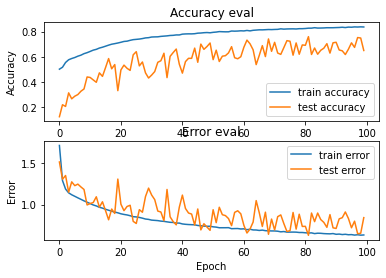

In [ ]:
plt.figure(figsize=(50,75))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
print("\n")
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

In [ ]:
y_pred = model.predict(X_cv)
y_pred = np.argmax(y_pred, axis=-1)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

Cross Validation Metrics
accuracy:0.649657463151339
Precesion:0.5455472467709042
Recall:0.18435561681598897
F1 Score:0.27558379120879123
Confusion Matrix:
[[14042  1337]
 [ 7101  1605]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.66      0.91      0.77     15379
           1       0.55      0.18      0.28      8706

    accuracy                           0.65     24085
   macro avg       0.60      0.55      0.52     24085
weighted avg       0.62      0.65      0.59     24085

___________******************************____________


<h2>Conclusion</h2>




<h4>About</h4>


* Approach : <br>
Intially obsereved the missing data. two features 'PRIMEUNIT' and 'AUCGUART' has almost 63k missing values 
* Removed these 2 features as extrapolating from 3419 values to 73k wouldnt be accurate
* the purchased date feature , vehicle age , vech year can be collinear , vechicle age and vech year might not be
* Removed PurchDate feature in place of it introduced Purchase Month, and PurDay : people tend to buy vehicle more on weekdays than weekends and people tend to buy more auction vechiles in autumn season
* Most of the data is skewed, used power transformer(similar to box cox) to Make data more gaussian like 
* challenge : box cox only works for positve values so used jeo johnson power transformer
* MMR price are higly correlated , created a new feature by adding those values
* Used column transformer to convert dataframe to ndarray with ohe for categorical and standsclaer for numerical categories , learned transformer tried it as pdconcat  has issues with different datatypes
* identity and created list for categorial columns and numerical columns which would help for tranformer techniques
* Used smote to upsample the imbalanced data to create 1.2 lakh data set
* Split the data for cross validation
* Used SVD to reduce the features to 200 as machine couldnt handle those many columns 
* Used most of the data is Gausian like used Naive gausin model
* used logistic regression as data is gausian like and binary classification
* Used Random Forest to check whether there can be improvement in accuracy but it performed the best 
* used 3 layered neural network with drop layers 

